 # 1. Introduction
      Airbnb is an online marketplace for arranging or offering lodging,primarily homestays, or tourism experiences since 2008. NYC is the most    populous city in the United States and also one of the most popular tourism and business place in the world.

      Airbnb NYC 2019 data contains listing activity and metrics. In this kernel, I would like to choose the best prediction model for price. Meanwhile, price feature's relationship examines with others and some data exploratory analysis will be made.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.shape

(48895, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.drop(["id","host_id","name","host_name","last_review"],axis=1,inplace=True)

In [7]:
df.head(20)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188


In [8]:
mean = df['reviews_per_month'].mean()
df['reviews_per_month'].fillna(mean, inplace=True)

df.reviews_per_month.isnull().sum()

0

In [9]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
df["neighbourhood_group"].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
len(df["neighbourhood"].unique())

221

In [12]:
ngs=df["neighbourhood_group"].unique()

In [13]:
for ng in ngs:
    print(ng)
    temp=df[df["neighbourhood_group"]==ng]
    
    print(temp.groupby("neighbourhood")["price"].mean().head())
    
    print("--------------------------------------------------")

Brooklyn
neighbourhood
Bath Beach             81.764706
Bay Ridge             144.432624
Bedford-Stuyvesant    107.678244
Bensonhurst            75.786667
Bergen Beach          106.700000
Name: price, dtype: float64
--------------------------------------------------
Manhattan
neighbourhood
Battery Park City    367.557143
Chelsea              249.738544
Chinatown            161.497283
Civic Center         191.942308
East Harlem          133.198747
Name: price, dtype: float64
--------------------------------------------------
Queens
neighbourhood
Arverne        171.779221
Astoria        117.187778
Bay Terrace    142.000000
Bayside        157.948718
Bayswater       87.470588
Name: price, dtype: float64
--------------------------------------------------
Staten Island
neighbourhood
Arden Heights                  67.250000
Arrochar                      115.000000
Bay Terrace, Staten Island    102.500000
Bull's Head                    47.333333
Castleton Corners             139.750000
Name: p

In [14]:
df.pivot_table(index='neighbourhood_group',columns='room_type',values='price',aggfunc='mean')

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


In [15]:
df["room_type"].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

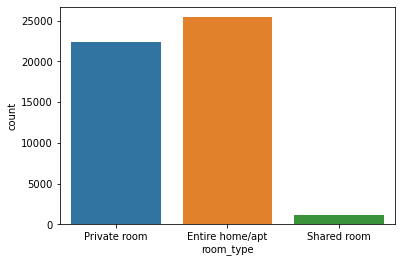

In [16]:
plt.figure()
sns.countplot(df["room_type"])
plt.show()

We can see that Entire home apartment has highest share followed by private room and least prefered is shared room

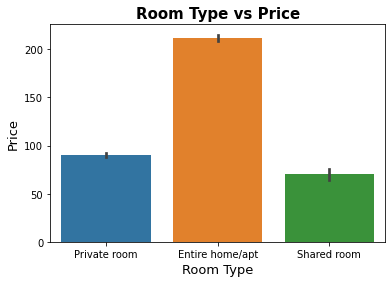

In [17]:
plt.figure()
sns.barplot(x='room_type', y='price', data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price",size=15, weight='bold')
plt.show()

    This graph is about the relationship between price and room type. The Shared room price is always lower than 200 dollars. On the other hand, the private room and the entire home have the highest price in some.

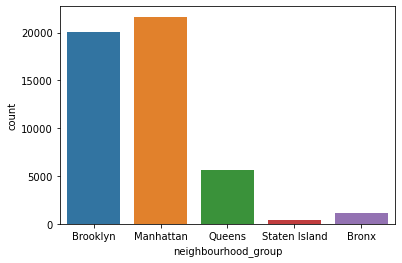

In [18]:
plt.figure()
sns.countplot(df["neighbourhood_group"])
plt.show()

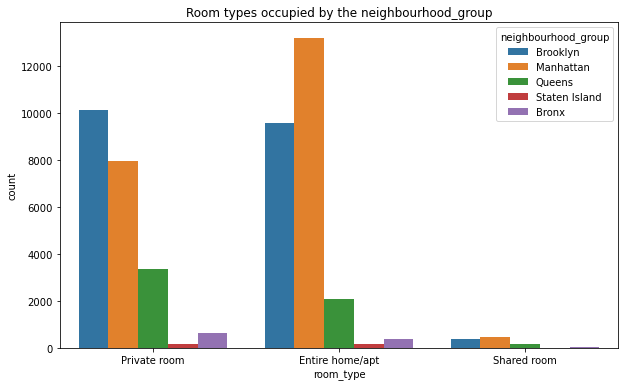

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

    This graph shows details about neighbourhood_group and room type. Private Room and Entire Home/Apt are more preferred 
    than shared room. Also, in Brooklyn, Private Room are highly preferred than any other room_type. On the other hand, Entire home/apt are highly preffered in manhattan and then in brooklyn

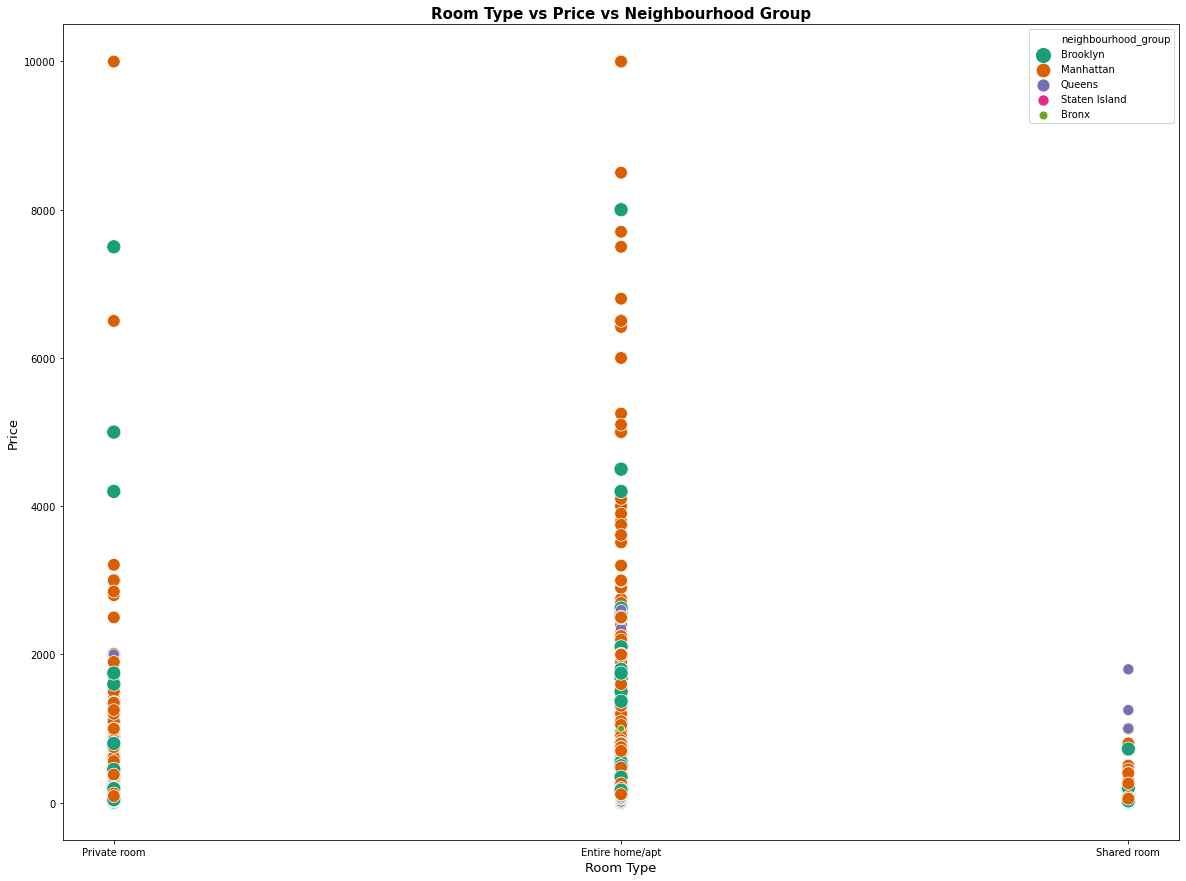

In [20]:
plt.figure(figsize=(20,15))
sns.scatterplot(x="room_type", y="price",
            hue="neighbourhood_group", size="neighbourhood_group",
            sizes=(50, 200), palette="Dark2", data=df)

plt.xlabel("Room Type", size=13)
plt.ylabel("Price", size=13)
plt.title("Room Type vs Price vs Neighbourhood Group",size=15, weight='bold')
plt.show()

    This graph shows details about price and room type based on neighborhood group. The highest price of Private Room and Entire Home/Aptis in the same area which is Manhattan. Also, Brooklyn has very-high prices both in Private Room and Entire Home/Apt. On the other hand, shared room's highest price is in the Queens area.

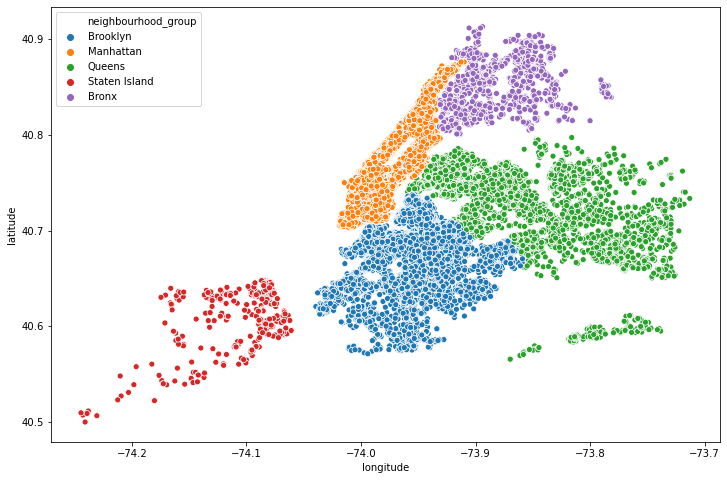

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(df["longitude"],df["latitude"],hue=df["neighbourhood_group"])
plt.show()

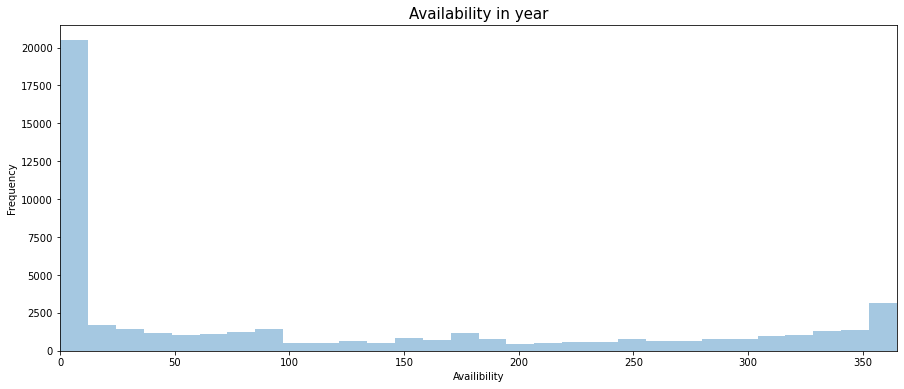

In [22]:
plt.figure(figsize=(15,6))
sns.distplot(df.availability_365, kde=False)
plt.xlim(0,365)
plt.title('Availability in year', fontsize=15)
plt.xlabel('Availibility')
plt.ylabel("Frequency")
plt.show()

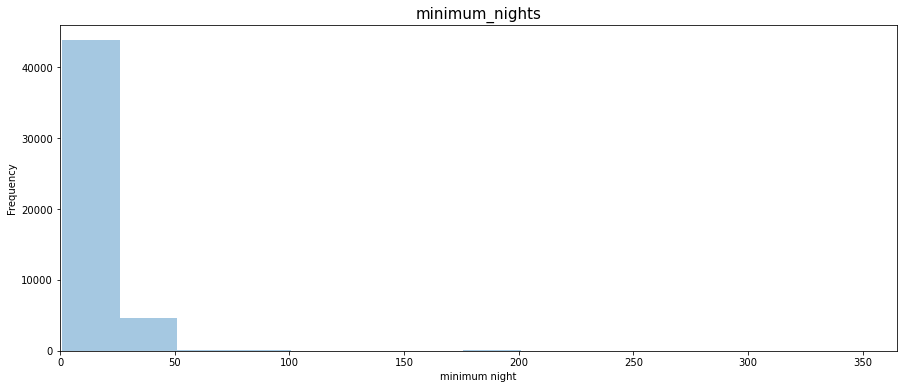

In [23]:
plt.figure(figsize=(15,6))
sns.distplot(df.minimum_nights, kde=False)
plt.xlim(0,365)
plt.title('minimum_nights', fontsize=15)
plt.xlabel('minimum night')
plt.ylabel("Frequency")
plt.show()

Bhavana Part:-

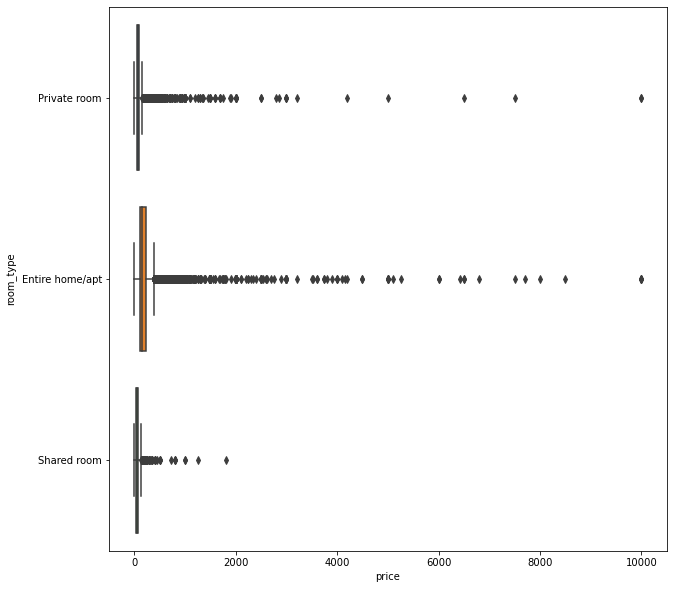

In [24]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df,x="price",y="room_type")
plt.show()

Text(0.5, 1.0, 'Price Distribution Plot')

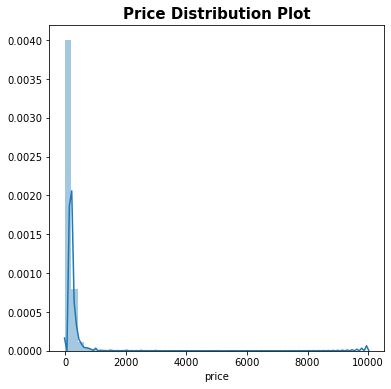

In [25]:
plt.figure(figsize=(6,6))
sns.distplot(df['price'])
plt.title("Price Distribution Plot",size=15, weight='bold')

The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

Since division by zero is a problem, (log+0.01) transformation would be better.

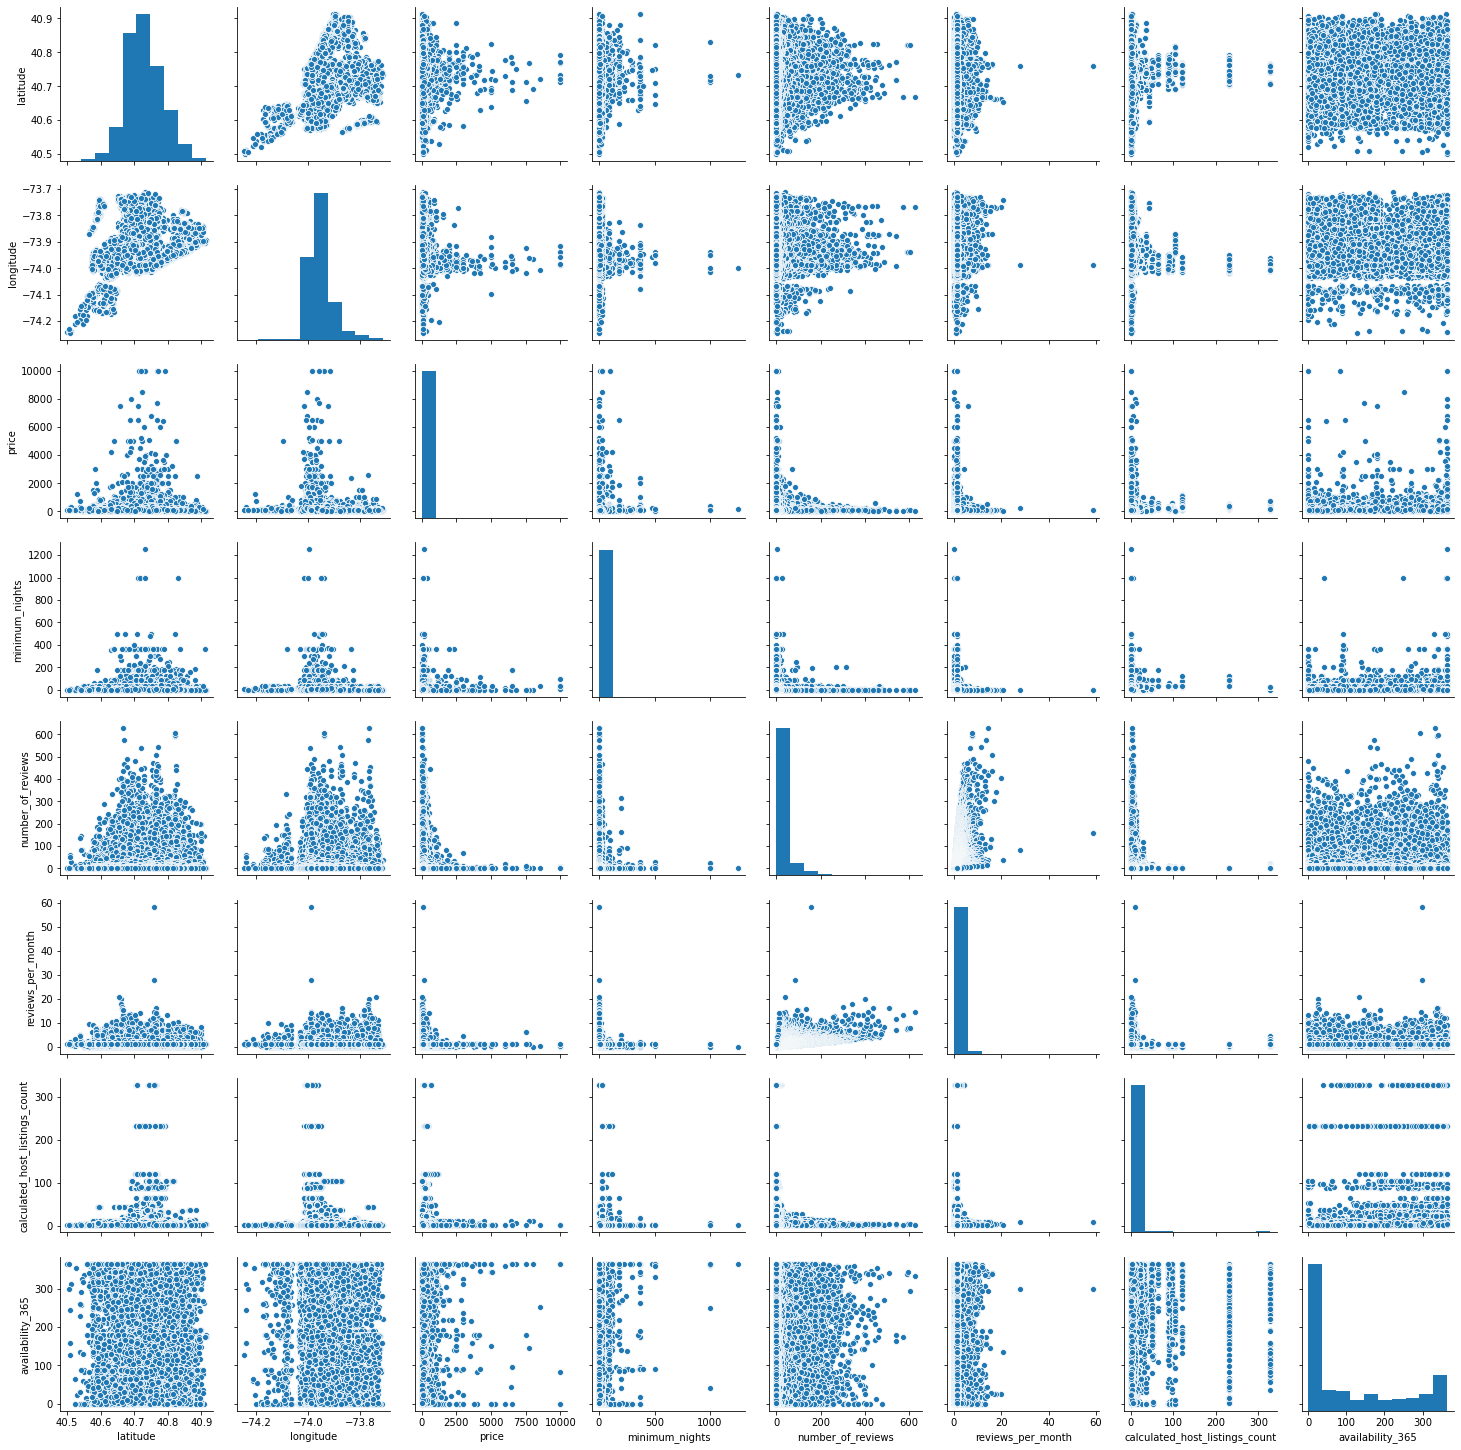

In [26]:
sns.pairplot(data=df)
plt.show()

In [27]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [28]:
len(df["price"].unique())

674

In [29]:
df.head(10)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.210000,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.380000,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1.373221,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.640000,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.100000,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.590000,1,129
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.400000,1,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.470000,1,220
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.990000,1,0
9,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.330000,4,188


In [30]:
print(len(df[df["price"]==0]))
print(len(df[df["availability_365"]==0]))
print(len(df[df["minimum_nights"]==0]))

11
17533
0


In [31]:
#df=df[df["price"]>0]
#df=df[df["availability_365"]>0]    

In [32]:
# Reducing Skewness
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64", "float64"])

latitude : 0.23715928263993233


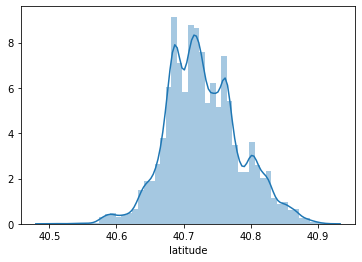

----------------------------
longitude : 1.2841708112016765


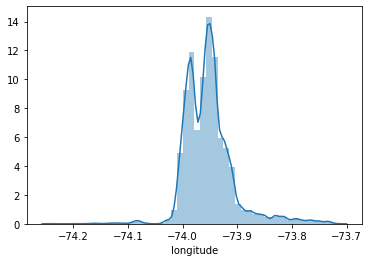

----------------------------
price : 19.118352459553982


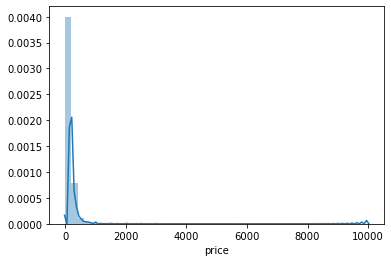

----------------------------
minimum_nights : 21.826604907169408


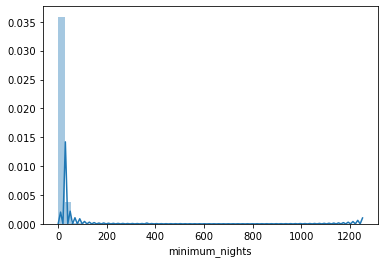

----------------------------
number_of_reviews : 3.6905213494042934


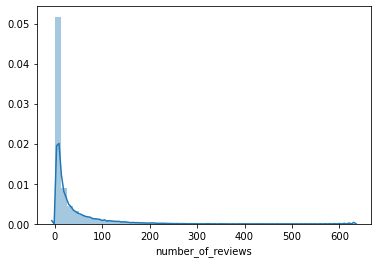

----------------------------
reviews_per_month : 3.5117983274795703


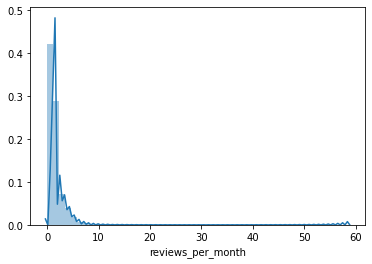

----------------------------
calculated_host_listings_count : 7.932930523838819


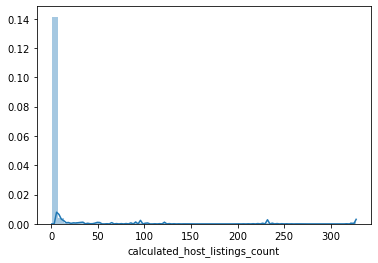

----------------------------
availability_365 : 0.7633841571088492


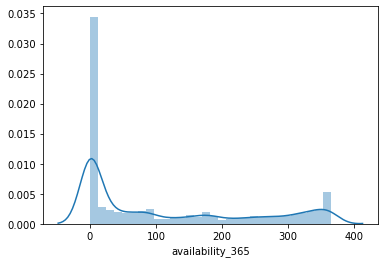

----------------------------


In [33]:
from scipy.stats import skew
for col in df_num:
  print(col, ":", skew(df_num[col]))
  sns.distplot(df_num[col])
  plt.show()
  print("----------------------------")

+ve skewed:- longitude,minimum_nights,number_of_reviews,reviews_per_month,availability_365

In [34]:
df_num["minimum_nights"]=np.sqrt(df_num["minimum_nights"])
df_num["minimum_nights"].skew()

3.908470155947235

In [35]:
df_num["minimum_nights"]=np.cbrt(df_num["minimum_nights"])
df_num["minimum_nights"].skew()

1.621369705113329

In [36]:
df_num["number_of_reviews"]=np.sqrt(df_num["number_of_reviews"])
df_num["number_of_reviews"].skew()

1.487020712837554

In [37]:
df_num["number_of_reviews"]=np.cbrt(df_num["number_of_reviews"])
df_num["number_of_reviews"].skew()

-0.5493276747505534

In [38]:
df_num["reviews_per_month"]=np.sqrt(df_num["reviews_per_month"])
df_num["reviews_per_month"].skew()

0.6779866579424985

In [39]:
#df_num["reviews_per_month"]=np.cbrt(df_num["reviews_per_month"])
#df_num["reviews_per_month"].skew()

In [40]:
df_num["availability_365"]=np.sqrt(df_num["availability_365"])
df_num["availability_365"].skew()

0.2743889558353108

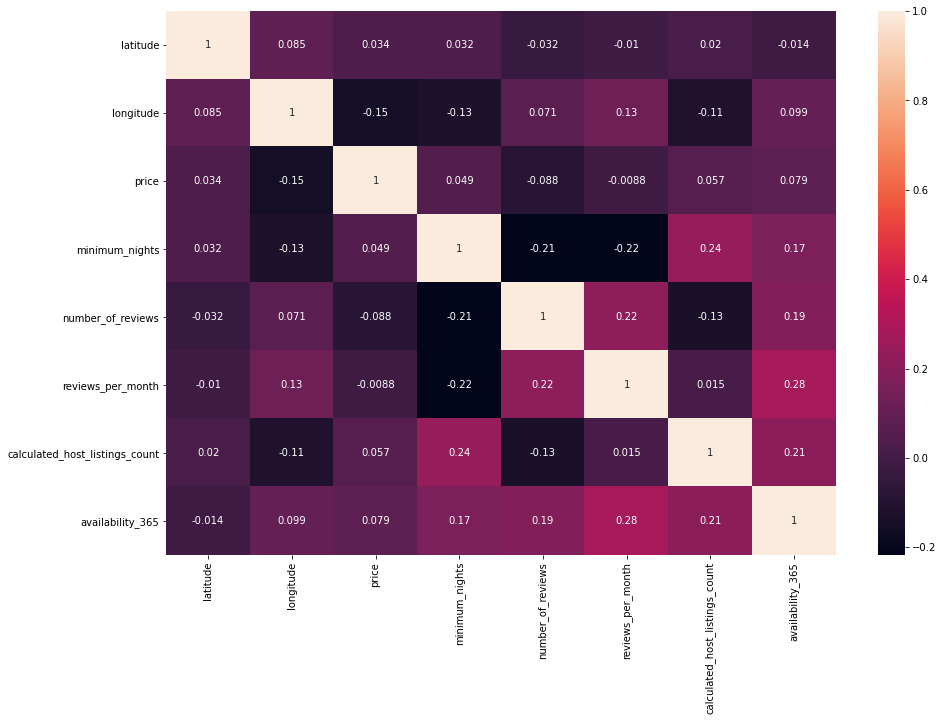

In [41]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

    when we check for corelation between target and other features ,there is no corelation between any of the feature with 
    the target variable price. And when we go further and check for collinearity between the features,so there is no 
    collinearity between the features.

In [42]:
from sklearn.preprocessing import MinMaxScaler
for col in df_num:
    mm=MinMaxScaler()
    df_num[col]=mm.fit_transform(df_num[[col]])
    
df_num.head()  

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,0.357393,0.511921,0.0149,0.000000,0.492718,0.047461,0.015337,1.000000
1,0.614199,0.490469,0.0225,0.000000,0.644308,0.068416,0.003067,0.986206
2,0.748252,0.569257,0.0150,0.088049,0.000000,0.141994,0.000000,1.000000
3,0.448496,0.535649,0.0089,0.000000,0.868531,0.272115,0.000000,0.729045
4,0.722820,0.565324,0.0080,0.204986,0.492718,0.028645,0.000000,0.000000


In [43]:
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])

df_cat.head(10)

,neighbourhood_group,neighbourhood,room_type
0,1,108,1
1,2,127,0
2,2,94,1
3,1,41,0
4,2,61,0
5,2,137,0
6,1,13,1
7,2,95,1
8,2,202,1
9,2,35,0


In [44]:
df_new=pd.concat([df_cat,df_num],axis=1)


In [45]:
df_new.head()

,neighbourhood_group,neighbourhood,room_type,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,1,108,1,0.357393,0.511921,0.0149,0.000000,0.492718,0.047461,0.015337,1.000000
1,2,127,0,0.614199,0.490469,0.0225,0.000000,0.644308,0.068416,0.003067,0.986206
2,2,94,1,0.748252,0.569257,0.0150,0.088049,0.000000,0.141994,0.000000,1.000000
3,1,41,0,0.448496,0.535649,0.0089,0.000000,0.868531,0.272115,0.000000,0.729045
4,2,61,0,0.722820,0.565324,0.0080,0.204986,0.492718,0.028645,0.000000,0.000000


In [46]:

x=df_new.drop(["price"],axis=1)
y=df_new["price"]

y=np.log(df_new["price"]+0.01)
print(y)


0       -3.692887
1       -3.426515
2       -3.688879
3       -3.968593
4       -4.017384
           ...   
48890   -4.074542
48891   -4.268698
48892   -3.839702
48893   -4.166915
48894   -3.963316
Name: price, Length: 48895, dtype: float64


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [49]:
lr=LinearRegression()
lr.fit(x_train,y_train)



LinearRegression()

In [50]:
print(lr.intercept_)
print(lr.coef_)

y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test,y_pred)

print("mse: {}, rmse: {}, r2: {}".format(mse,rmse,r2))

print("""slope={}
intercept={}
bias={}
variance={}""".format(lr.coef_,lr.intercept_,lr.score(x_train,y_train),lr.score(x_test,y_test)))

-3.1146418525056228
[ 2.80520047e-02  3.20320537e-04 -3.97176715e-01  2.15560771e-01
 -1.09445561e+00 -5.06004889e-01 -2.48591288e-01 -6.47160028e-02
  5.52684189e-02  2.06603813e-01]
mse: 0.09845799185937852, rmse: 0.31378016485969684, r2: 0.39044579648706224
slope=[ 2.80520047e-02  3.20320537e-04 -3.97176715e-01  2.15560771e-01
 -1.09445561e+00 -5.06004889e-01 -2.48591288e-01 -6.47160028e-02
  5.52684189e-02  2.06603813e-01]
intercept=-3.1146418525056228
bias=0.41251661369811965
variance=0.39044579648706224


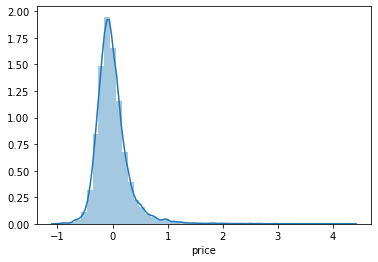

In [51]:
#y_hat=lr.predict(x_test)
residuals=y_test - y_pred

# print(y_hat)
sns.distplot(residuals)

#mimansa Part:-

In [52]:
from sklearn.linear_model import Lasso,Ridge

In [53]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
for i in alphas:
    r=Ridge(alpha=i)
    r.fit(x_train,y_train)
    print(i,"=",r.score(x_test,y_test))

1.0 = 0.39048488615775767
0.1 = 0.3904498324310901
0.01 = 0.3904462013616161
0.001 = 0.3904458369873296
0.0001 = 0.3904458005372171
0.0 = 0.39044579648706224


In [54]:
 alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
for i in alphas:
    r=Lasso(alpha=i)
    r.fit(x_train,y_train)
    print(i,"=",r.score(x_test,y_test))

1.0 = 0.012823359411118451
0.1 = 0.10584981161144291
0.01 = 0.3148883686965639
0.001 = 0.3893416893394831
0.0001 = 0.39056098674700623
0.0 = 0.39044579648706224


In [55]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(lr,x,y,cv=5)

In [56]:
cross_val

array([0.33906714, 0.39248632, 0.38642321, 0.42641995, 0.43079944])

In [57]:
np.mean(cross_val)

0.3950392141089769

In [58]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(3)
x_poly=pf.fit_transform(x)
x_train_poly,x_test_poly,y_train_poly,y_test_poly=train_test_split(x_poly,y,random_state=1,test_size=0.3)
Ir=LinearRegression()
Ir.fit(x_train_poly,y_train_poly)
y_pred=Ir.predict(x_test_poly)
print(mean_squared_error(y_test_poly,y_pred))
print("r2 score:",r2_score(y_test_poly,y_pred))



0.08352794971721372
r2 score: 0.4828778050474216


In [59]:
pf=PolynomialFeatures(4)

x_poly=pf.fit_transform(x)
x_train_poly,x_test_poly,y_train_poly,y_test_poly=train_test_split(x_poly,y,random_state=1,test_size=0.3)
Ir=LinearRegression()
Ir.fit(x_train_poly,y_train_poly)
y_pred=Ir.predict(x_test_poly)
print(mean_squared_error(y_test_poly,y_pred))
print("r2 score:",r2_score(y_test_poly,y_pred))




0.08244014830181656
r2 score: 0.4896123921827117


In [ ]:
pf=PolynomialFeatures(5)

x_poly=pf.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,random_state=1,test_size=0.3)
Ir=LinearRegression()
Ir.fit(x_train,y_train)
y_pred=Ir.predict(x_test)
print(mean_squared_error(y_test,y_pred))
print("r2 score:",r2_score(y_test,y_pred))


In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression

In [ ]:
annova = SelectKBest(score_func=f_regression, k=8)
fitted = annova.fit(x,y)
featurescores = pd.DataFrame(fitted.scores_, columns=['Score'])
featurescores['Columns'] = x.columns
print(featurescores)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [ ]:
print(featurescores.nlargest(10, 'Score'))

In [ ]:
x_train_annova = annova.transform(x_train)
x_test_annova = annova.transform(x_test)
lr_annova = LinearRegression()
lr_annova.fit(x_train_annova, y_train)
print(lr_annova.score(x_test_annova, y_test))

In [ ]:

for K in range(9, 2, -1):
    annova = SelectKBest(score_func=f_regression, k = K)
    annova.fit(x,y)
    x_train_annova = annova.transform(x_train)
    x_test_annova = annova.transform(x_test)
    lr_annova = LinearRegression()
    lr_annova.fit(x_train_annova, y_train)
    print(K, ":", lr_annova.score(x_test_annova, y_test),)
    
    


# PCA 

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
##  using PCA with linear regression model
for n in range(9,1,-1):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca,y,random_state=1,test_size=0.3)
    lr = LinearRegression()
    lr.fit(x_pca_train,y_train)
    print(n,":", lr.score(x_pca_test, y_test))

In [ ]:
#using PCA with polynomial (degree=3) model
for n in range(9,1,-1):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    pf=PolynomialFeatures(degree=3)
    x_pca_poly=pf.fit_transform(x_pca)
    x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca_poly,y,random_state=1,test_size=0.3)
    lr=LinearRegression()
    lr.fit(x_pca_train,y_train)
    print(n,":", lr.score(x_pca_test, y_test))
    
    
    


In [ ]:
#using PCA with polynomial (degree=4) model
for n in range(9,1,-1):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    pf=PolynomialFeatures(degree=4)
    x_pca_poly=pf.fit_transform(x_pca)
    x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca_poly,y,random_state=1,test_size=0.3)
    lr=LinearRegression()
    lr.fit(x_pca_train,y_train)
    print(n,":", lr.score(x_pca_test, y_test))
    

In [ ]:
#using PCA with polynomial (degree=5) model
for n in range(9,1,-1):
    pca = PCA(n_components=n)
    x_pca = pca.fit_transform(x)
    pf=PolynomialFeatures(degree=5)
    x_pca_poly=pf.fit_transform(x_pca)
    x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca_poly,y,test_size=0.3)
    lr=LinearRegression()
    lr.fit(x_pca_train,y_train)
    print(n,":", lr.score(x_pca_test, y_test))
    

# XG Boosting Regressor

In [ ]:
import xgboost as xgb
#xgb.__version__

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.1,max_depth = 15, n_estimators = 100)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)    
xg_reg.fit(x_train,y_train)
xg_reg.score(x_test,y_test)

y_pred = xg_reg.predict(x_test)
print(r2_score(y_test,y_pred))

In [ ]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 15, n_estimators = 200)
xg_reg.fit(x_train,y_train)
xg_reg.score(x_test,y_test)

y_pred = xg_reg.predict(x_test)
print(r2_score(y_test,y_pred))

In [ ]:
xg_reg = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 15, n_estimators = 300)
xg_reg.fit(x_train,y_train)
xg_reg.score(x_test,y_test)

y_pred = xg_reg.predict(x_test)
print(r2_score(y_test,y_pred))

# K-Nearest Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(20, metric="euclidean")
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

r2 = r2_score(y_test, y_pred)

print("R2 score: {}".format(r2))

# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)
rf_reg.score(x_test,y_test)
y_pred=rf_reg.predict(x_test)
print(r2_score(y_test,y_pred))

In [ ]:

rf_reg=RandomForestRegressor(n_estimators=500,max_depth=15,n_jobs=2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
rf_reg.fit(x_train,y_train)
rf_reg.score(x_test,y_test)
y_pred=rf_reg.predict(x_test)
print(r2_score(y_test,y_pred))

In [ ]:
rf_reg=RandomForestRegressor(n_estimators=700,max_depth=15,n_jobs=2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
rf_reg.fit(x_train,y_train)
rf_reg.score(x_test,y_test)
y_pred=rf_reg.predict(x_test)
print(r2_score(y_test,y_pred))

In [ ]:
rf_reg=RandomForestRegressor(n_estimators=1000,max_depth=15,n_jobs=2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
rf_reg.fit(x_train,y_train)
rf_reg.score(x_test,y_test)
y_pred=rf_reg.predict(x_test)
print(r2_score(y_test,y_pred))

In [ ]:
rf_reg=RandomForestRegressor(n_estimators=1200,max_depth=15,n_jobs=2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
rf_reg.fit(x_train,y_train)
rf_reg.score(x_test,y_test)
y_pred=rf_reg.predict(x_test)
print(r2_score(y_test,y_pred))

In [ ]:
residuals=(y_test-y_pred)
sns.distplot(residuals)
plt.show()

In [ ]:
rf_reg=RandomForestRegressor(n_estimators=1400,max_depth=15,n_jobs=2)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
rf_reg.fit(x_train,y_train)
rf_reg.score(x_test,y_test)
y_pred=rf_reg.predict(x_test)
print(r2_score(y_test,y_pred))

# Final Conclusion